In [1]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

In [2]:
# Reading a file
df=pd.read_csv('G:/OS work/Files/all_data_copy.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [3]:
df.isnull().sum()      # Checking if there is any null value.

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [4]:
print((df.isnull().sum()*100)/len(df))
# only 0.3% data is having a null value,therefore they can be removed.

Order ID            0.291678
Product             0.291678
Quantity Ordered    0.291678
Price Each          0.291678
Order Date          0.291678
Purchase Address    0.291678
dtype: float64


In [5]:
df=df.dropna(axis=0)   # Removing na values

In [6]:
df.isnull().sum()   # Again checking if there are any null values

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
df.info() # Getting an info about the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372610 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 19.9+ MB


In [8]:
# checking for garbage data and then removing them
df=df[df['Quantity Ordered']!='Quantity Ordered']



In [9]:
# Since both Quantity ordered and Price Each is object type columns,we need to change thier type into int and float resp.
df['Quantity Ordered']=df['Quantity Ordered'].astype('int32')
df['Price Each']=df['Price Each'].astype('float')

In [10]:
# Also changing Order Date's type to Date-time.
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')

In [11]:
df.dtypes # again checking the types of all the columns.

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [12]:
df['Month']=df['Order Date'].dt.month     # Adding Month column
df['Hour']=df['Order Date'].dt.hour       # Adding hour column

In [13]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11


In [14]:
# Dividing Hours into Morning,Afternoon,Evening and Night.
df=df.assign(session=pd.cut(df['Order Date'].dt.hour,
                            [0,6,12,18,23],
                            labels=['Night','Morning','Afternoon','Evening'],
                            include_lowest=True))
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,session
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,21,Evening
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14,Afternoon
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,13,Afternoon
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,20,Evening
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11,Morning
...,...,...,...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,20,Evening
373696,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,16,Afternoon
373697,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,7,Morning
373698,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,17,Afternoon


### Q4:What is the distribution of sales among different cities in different months?

#### a:Which city had the highest sales overall?

In [15]:
# First adding a sales column by multiplying Quantity Ordered and Price Each
df['Sales']=df['Quantity Ordered']*df['Price Each']


In [16]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,session,Sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,21,Evening,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14,Afternoon,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,13,Afternoon,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,20,Evening,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11,Morning,11.99


In [17]:
# To get a City column,we need to divide a string from Purchase address and extract out the city
# Also Portland is having 2 pin codes,they need to be treated separately
# Further dividing a string from Purchase Address and getting the pin code
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

In [18]:
df['City']=df['Purchase Address'].apply(lambda x: get_city(x)+' '+get_state(x))

In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,session,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,21,Evening,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14,Afternoon,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,13,Afternoon,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,20,Evening,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11,Morning,11.99,Austin TX


Text(0.5, 1.0, 'Sales In Each City')

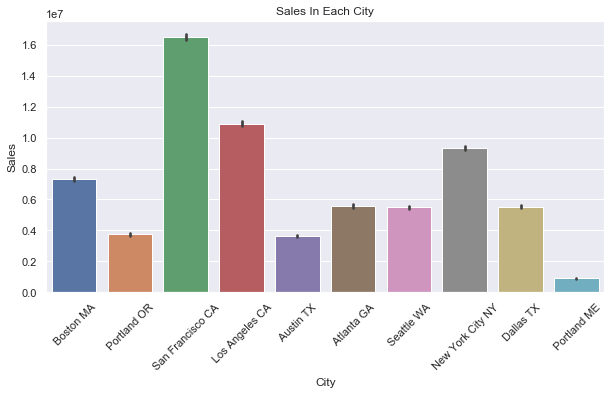

In [20]:
# Plotting a Bar plot between city and Total sales
plt.figure(figsize=(10,5))                              # Defining Plot size
sns.barplot(x='City',y='Sales',data=df,estimator=sum)   # Plotting a bar plot
plt.xticks(rotation=45)                                 # Setting a rotation of x-ticks
plt.title('Sales In Each City')                         # Setting a Title for plot

# From the graph,we can clearly see that San Francisco has highest sales among all the cities

In [21]:
print(df.groupby('City')['Sales'].sum())

City
 Atlanta GA           5590997.16
 Austin TX            3639163.50
 Boston MA            7323284.02
 Dallas TX            5535950.80
 Los Angeles CA      10905141.60
 New York City NY     9328634.86
 Portland ME           899516.54
 Portland OR          3741464.68
 San Francisco CA    16524407.82
 Seattle WA           5495510.96
Name: Sales, dtype: float64


#### b: Which Month had the highest amount of sales overall?

Text(0.5, 1.0, 'Sales in Each Month')

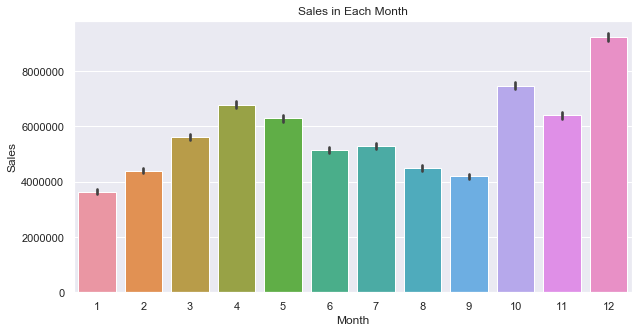

In [22]:
# Grouping a data by Month column and plotting a bar plot between month and total sales
plt.figure(figsize=(10,5))
sns.barplot(x='Month',y='Sales',data=df,estimator=sum)
plt.title('Sales in Each Month')

# So here,we can see that December is having highest sales among all the months.

#### c:Most bought products per city.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

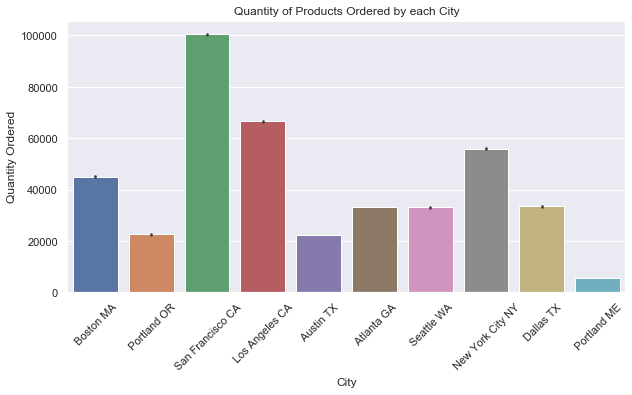

In [23]:
# Here also plotting a bar plot between City and Quantity ordered.

plt.figure(figsize=(10,5))
sns.barplot(x='City',y='Quantity Ordered',data=df,estimator=sum)
plt.title('Quantity of Products Ordered by each City')
plt.xticks(rotation=45)

# Here also San Francisco is having most ordered quantites.

### Based on your analysis, suggest a city for establishing a new branch for the retail store backed with proper reasoning.

In [24]:
# Since San Francisco is having highest sales as well as highest quantity ordered,
# it should be chosen for establishing a new branch for the retail store

### a:What products are mostly sold at different times of the day?

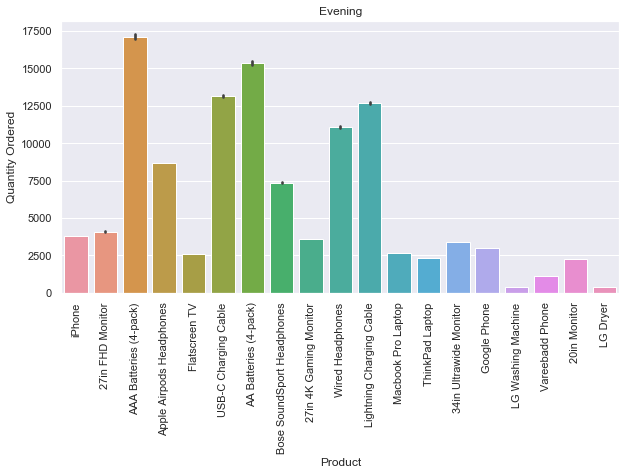

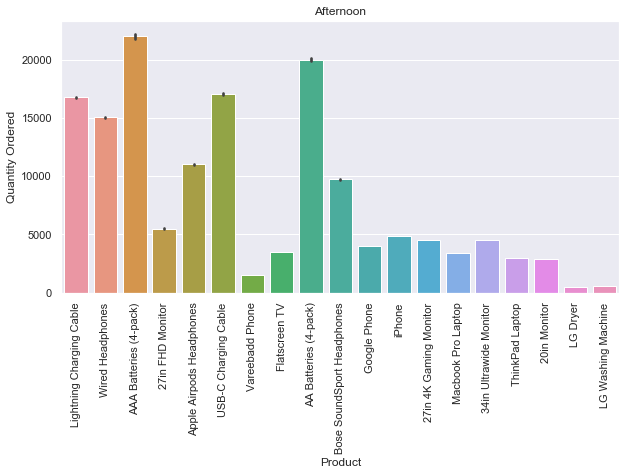

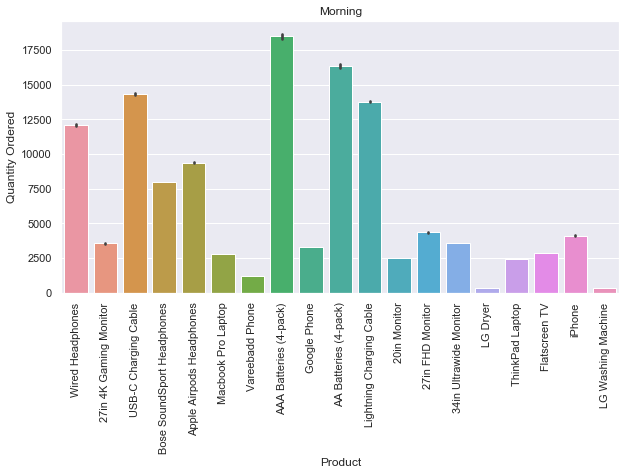

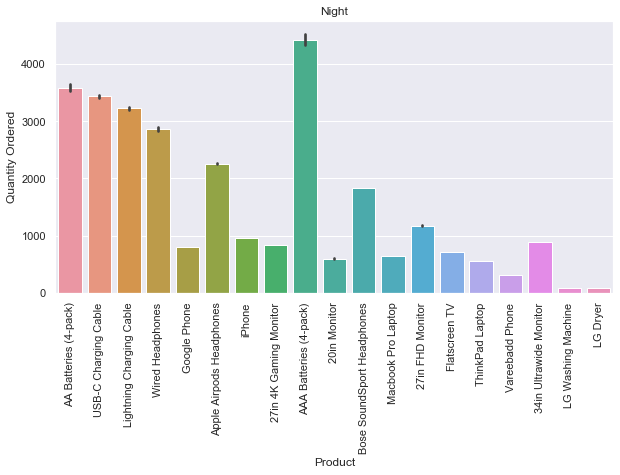

In [25]:
# Plotting a Indivisual plot between Product and Quantity Ordered as per a session

for i in df['session'].unique():
    plt.figure(figsize=(10,5))
    sns.barplot(x='Product',y='Quantity Ordered',data=df[df['session']==i],estimator=sum)
    plt.xticks(rotation='vertical')
    plt.title(i)

# So here,we can see that AAA Batteries(4-packs) are mostly sold items.

Text(0.5, 1.0, 'Products Sold at Different Times')

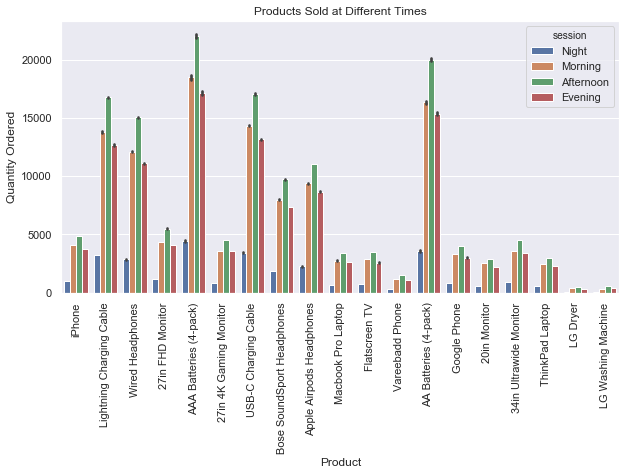

In [26]:
# Plotting all sessions on same graph

plt.figure(figsize=(10,5))
sns.barplot(x='Product',y='Quantity Ordered',data=df,hue='session',estimator=sum)
plt.xticks(rotation='vertical')
plt.title('Products Sold at Different Times')

### b:Which time of day has the most sales?

Text(0.5, 1.0, 'Sales Trend')

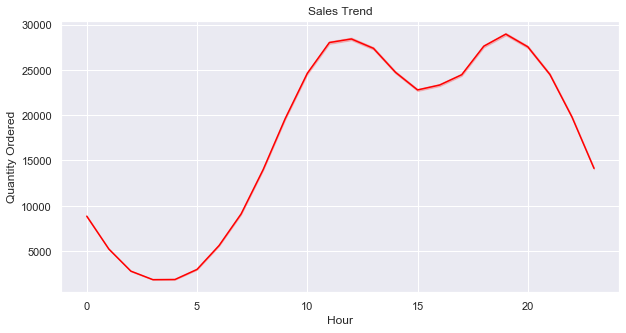

In [27]:
# Here we need to plot a line plot to see a time trend.
plt.figure(figsize=(10,5))
sns.lineplot(x='Hour',y='Quantity Ordered',data=df,estimator=sum,color='red')
plt.title('Sales Trend')


### Based on your analysis, suggest the best working hours and the best products for the retail stores in each city.

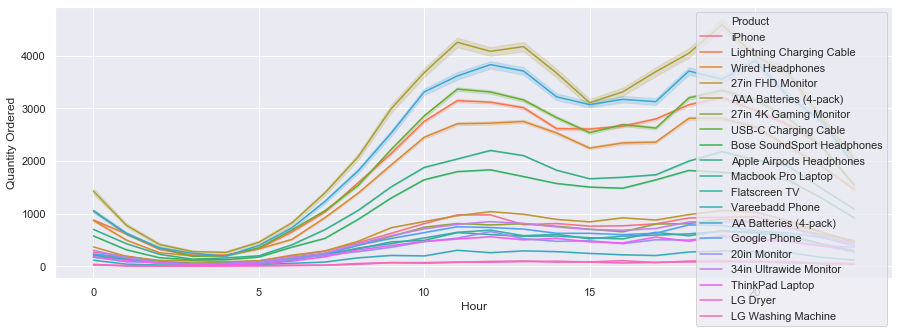

In [28]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Hour',y='Quantity Ordered',data=df,hue='Product',estimator=sum)

In [29]:
# From a Graph,we can see the from 10 to 20 ,we are having most no of quantites ordered.
# and most quantity of product sold is AAA- Batteries
#therefore,we can say that the best working hours is between 10AM to 8PM.

### 6:Find out the pair of products that are most sold together.

In [73]:
# Dropping a Duplicates
df2=df.drop_duplicates(inplace=True)

In [75]:
df2=df[df['Order ID'].duplicated(keep=False)]
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,session,Sales,City
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,16,Afternoon,11.95,Austin TX
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,16,Afternoon,11.99,Austin TX
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,8,Morning,150.00,Los Angeles CA
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,8,Morning,11.52,Los Angeles CA
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,11,Morning,400.00,New York City NY
...,...,...,...,...,...,...,...,...,...,...,...
186761,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",12,0,Night,11.99,Portland OR
186773,319596,iPhone,1,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,8,Morning,700.00,New York City NY
186774,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,8,Morning,14.95,New York City NY
186809,319631,34in Ultrawide Monitor,1,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",12,22,Evening,379.99,Austin TX


In [76]:
# Grouping the items that are brought together
# Idea is their Order ID will be same and therefore grouping them with Order ID.

df2['Grouped']=df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2


C:\Users\Abhishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,session,Sales,City,Grouped
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,16,Afternoon,11.95,Austin TX,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,16,Afternoon,11.99,Austin TX,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,8,Morning,150.00,Los Angeles CA,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,8,Morning,11.52,Los Angeles CA,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,11,Morning,400.00,New York City NY,"Vareebadd Phone,Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...,...
186761,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",12,0,Night,11.99,Portland OR,"iPhone,Wired Headphones"
186773,319596,iPhone,1,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,8,Morning,700.00,New York City NY,"iPhone,Lightning Charging Cable"
186774,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,8,Morning,14.95,New York City NY,"iPhone,Lightning Charging Cable"
186809,319631,34in Ultrawide Monitor,1,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",12,22,Evening,379.99,Austin TX,"34in Ultrawide Monitor,Lightning Charging Cable"


In [77]:
# Dropping the duplicates and getting only Order ID and Grouped columns.
df2=df2[['Order ID','Grouped']].drop_duplicates()
df2.head()

,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [84]:
# Counting the grouped items

from itertools import combinations
from collections import Counter

count=Counter()

for row in df2['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1002),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 159),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

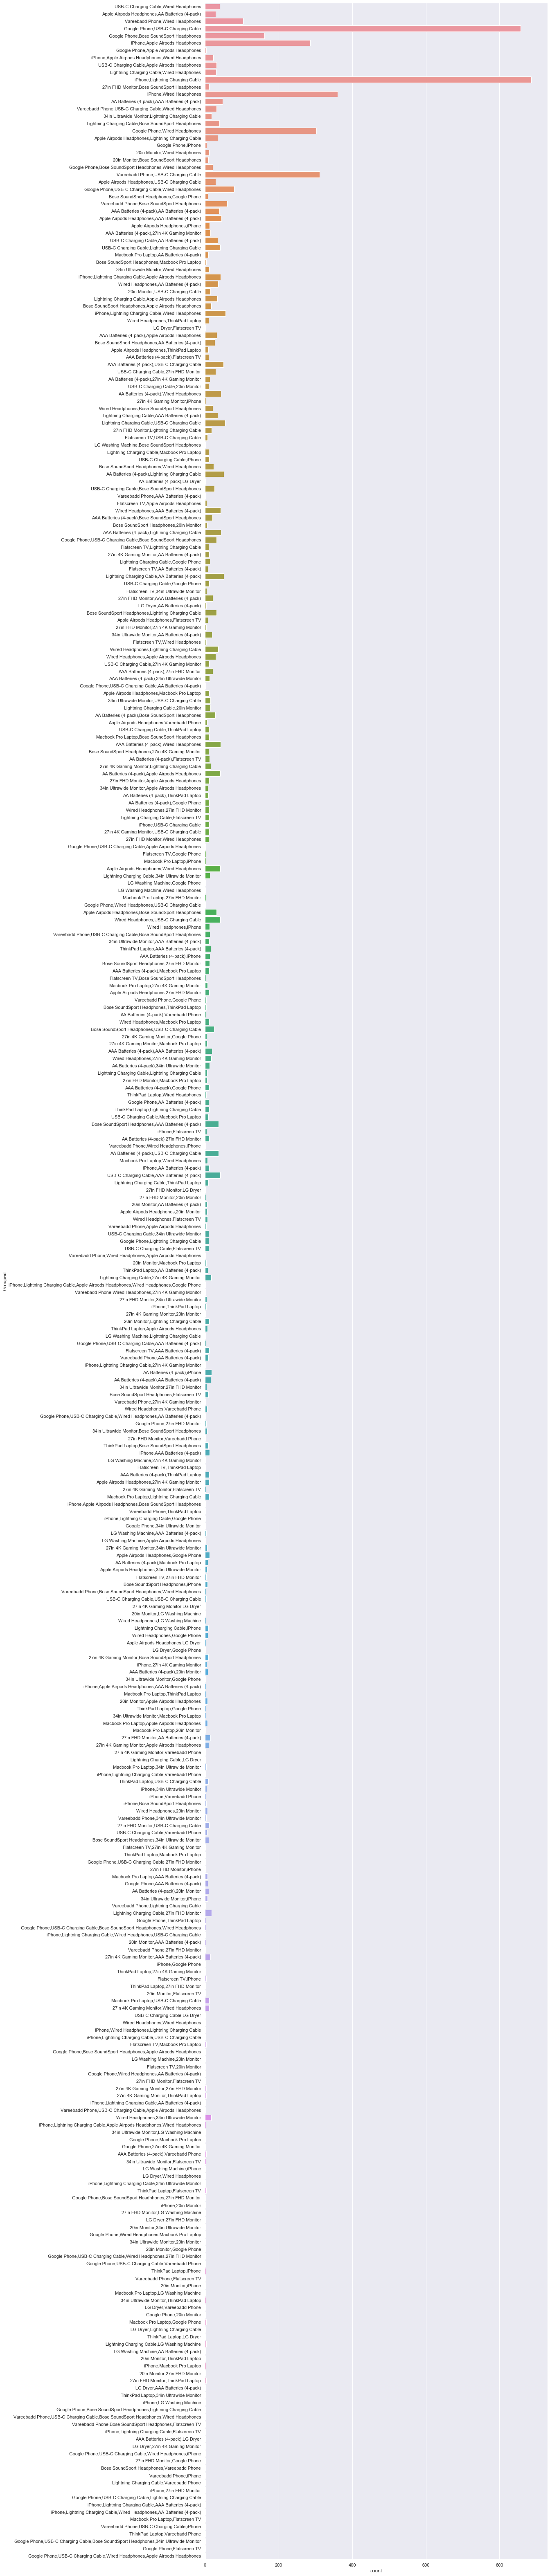

In [87]:
plt.figure(figsize=(15,115))
sns.countplot(y='Grouped',data=df2)

# We can see,Iphone with USB-C charging cable is most brought together items follewed by Google Phone with USB-C cable
# An offer/discount can be given to USB-C cable when Iphone/Google Phone is brought by a customer